In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

# Hyper Parameters 
input_size = 784
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

In [2]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Processing...
Done!


In [3]:
print(len(train_dataset))
print(len(test_dataset))

# 1データだけ取得
image, label = iter(train_loader).next()
print(image.type(), label.type())
print(image.size(), label.size())

60000
10000
torch.FloatTensor torch.LongTensor
torch.Size([100, 1, 28, 28]) torch.Size([100])


In [0]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [0]:
def train(train_loader):
    model.train()
    running_loss = 0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28 * 28)
        
        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        running_loss += loss.item()

        loss.backward()
        optimizer.step()

    train_loss = running_loss / len(train_loader)
    
    return train_loss


def valid(test_loader):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    for batch_idx, (images, labels) in enumerate(test_loader):
        images = images.view(-1, 28 * 28)

        outputs = model(images)

        loss = criterion(outputs, labels)
        running_loss += loss.item()

        _, predicted = outputs.max(1, keepdim=True)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
        total += labels.size(0)

    val_loss = running_loss / len(test_loader)
    val_acc = correct / total
    
    return val_loss, val_acc

In [7]:
loss_list = []
val_loss_list = []
val_acc_list = []
for epoch in range(num_epochs):
    loss = train(train_loader)
    val_loss, val_acc = valid(test_loader)

    print('epoch %d, loss: %.4f val_loss: %.4f val_acc: %.4f' % (epoch, loss, val_loss, val_acc))
    
    # logging
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

epoch 0, loss: 2.0226 val_loss: 1.7729 val_acc: 0.7165
epoch 1, loss: 1.6094 val_loss: 1.4405 val_acc: 0.7791
epoch 2, loss: 1.3452 val_loss: 1.2253 val_acc: 0.8069
epoch 3, loss: 1.1703 val_loss: 1.0793 val_acc: 0.8206
epoch 4, loss: 1.0484 val_loss: 0.9751 val_acc: 0.8302
epoch 5, loss: 0.9592 val_loss: 0.8973 val_acc: 0.8378
epoch 6, loss: 0.8913 val_loss: 0.8372 val_acc: 0.8418
epoch 7, loss: 0.8379 val_loss: 0.7892 val_acc: 0.8461
epoch 8, loss: 0.7946 val_loss: 0.7499 val_acc: 0.8504
epoch 9, loss: 0.7588 val_loss: 0.7172 val_acc: 0.8548
epoch 10, loss: 0.7286 val_loss: 0.6893 val_acc: 0.8589
epoch 11, loss: 0.7028 val_loss: 0.6654 val_acc: 0.8603
epoch 12, loss: 0.6804 val_loss: 0.6446 val_acc: 0.8625
epoch 13, loss: 0.6608 val_loss: 0.6263 val_acc: 0.8648
epoch 14, loss: 0.6434 val_loss: 0.6101 val_acc: 0.8674
epoch 15, loss: 0.6279 val_loss: 0.5955 val_acc: 0.8686
epoch 16, loss: 0.6140 val_loss: 0.5824 val_acc: 0.8701
epoch 17, loss: 0.6014 val_loss: 0.5706 val_acc: 0.8722
ep

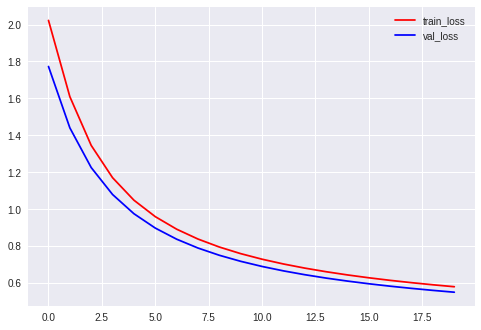

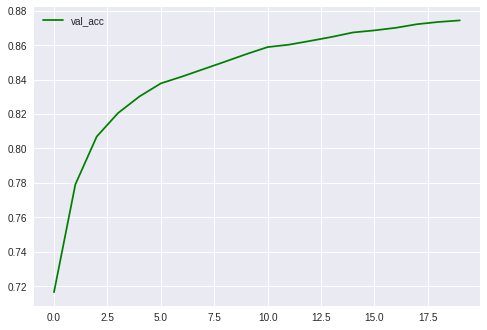

In [8]:
import matplotlib.pyplot as plt

# plot learning curve
plt.figure()
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()

plt.figure()
plt.plot(range(num_epochs), val_acc_list, 'g-', label='val_acc')
plt.legend()